# 각 아파트 가격 정보 EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import gc
from sklearn.preprocessing import MinMaxScaler

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('../data/preprocessed/27_school_district.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_80203/3515905086.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/27_school_district.csv')


In [3]:
apart_name_list = df['아파트명'].unique()

In [4]:
len(apart_name_list)

6550

# 이상치 탐색
- 갑자기 뚝 떨어지는 구간
- 갑자기 확 상승하는 구간

##### 1

In [ ]:
tmp = df[df['아파트명']==apart_name_list[0]][['아파트명', '계약년월', 'target']]
tmp

In [ ]:
tmp_target_df = pd.DataFrame(tmp.groupby('계약년월')['target'].mean())
tmp_target_df.reset_index(inplace=True)
tmp_target_df

In [ ]:
plt.figure(figsize=(30, 5))
sns.lineplot(x='계약년월', y='target', data=tmp_target_df, marker='o')
plt.grid(True)
plt.show()

In [ ]:
tmp[(tmp['계약년월']>=200800) & (tmp['계약년월']<=201000)]

#### 2

In [ ]:
tmp = df[df['아파트명']==apart_name_list[1]][['아파트명', '계약년월', 'target']]

tmp_target_df = pd.DataFrame(tmp.groupby('계약년월')['target'].mean())
tmp_target_df.reset_index(inplace=True)

plt.figure(figsize=(30, 5))
sns.lineplot(x='계약년월', y='target', data=tmp_target_df, marker='o')
plt.grid(True)
plt.show()

In [ ]:
tmp.iloc[0, 2]=10
tmp

# 이상치 처리
- 양 옆의 2년 총 4년치의 평균보다 2배이상 크거나 2배이하 작은 경우 이상치로 판단
- 양 사이드 4년의 평균 값으로 값을 대체한다.

1. '계약년월'을 기준으로 그룹화
2. 이상치가 존재하는 위치를 찾는다.
3. 해당 '계약년월'의 값을 모두 평균으로 처리

In [5]:
# 1. '아파트명'을 기준으로 데이터를 분할한다.
train_df = df[df['is_test'] == 0]
apart_df_list = []

for apart in apart_name_list:
    apart_df_list.append(train_df[train_df['아파트명'] == apart])

In [8]:
# 2. 이상치 처리

def find_outlier(apart_df):
    tmp = apart_df.sort_values(['계약년월', '계약일'])
    tmp.reset_index(inplace=True)
    l = tmp.shape[0]

    for i in range(2, l-2):
        current = tmp.iloc[i]['target']
        mn = (tmp.iloc[i-2:i+3]['target'].sum() - current)/4

        if (current <= (mn/2)) or (current >= (mn*2)):
            tmp.iloc[i, 52] = mn
    
    return tmp

In [9]:
test = apart_df_list[0].sort_values(['계약년월', '계약일'])
test.reset_index(inplace=True)
test

,level_0,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,...,아파트 카테고리,지하철 카테고리,구 카테고리,건설사 카테고리,가장 가까운 다리와의 거리,가장 가까운 다리 index,가장 가까운 다리,인근 한강다리 개수,인근 다리 개수 1개이상 3개 이하,학군
0,1075994,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,200703,9,2,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
1,1075995,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,200703,9,4,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
2,1004784,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,200804,17,4,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
3,1004785,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,200805,10,5,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
4,133981,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,200810,4,1,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,236526,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,202109,2,2,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
97,222654,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,202112,4,3,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
98,222655,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,202204,12,4,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
99,222656,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,202204,21,2,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0


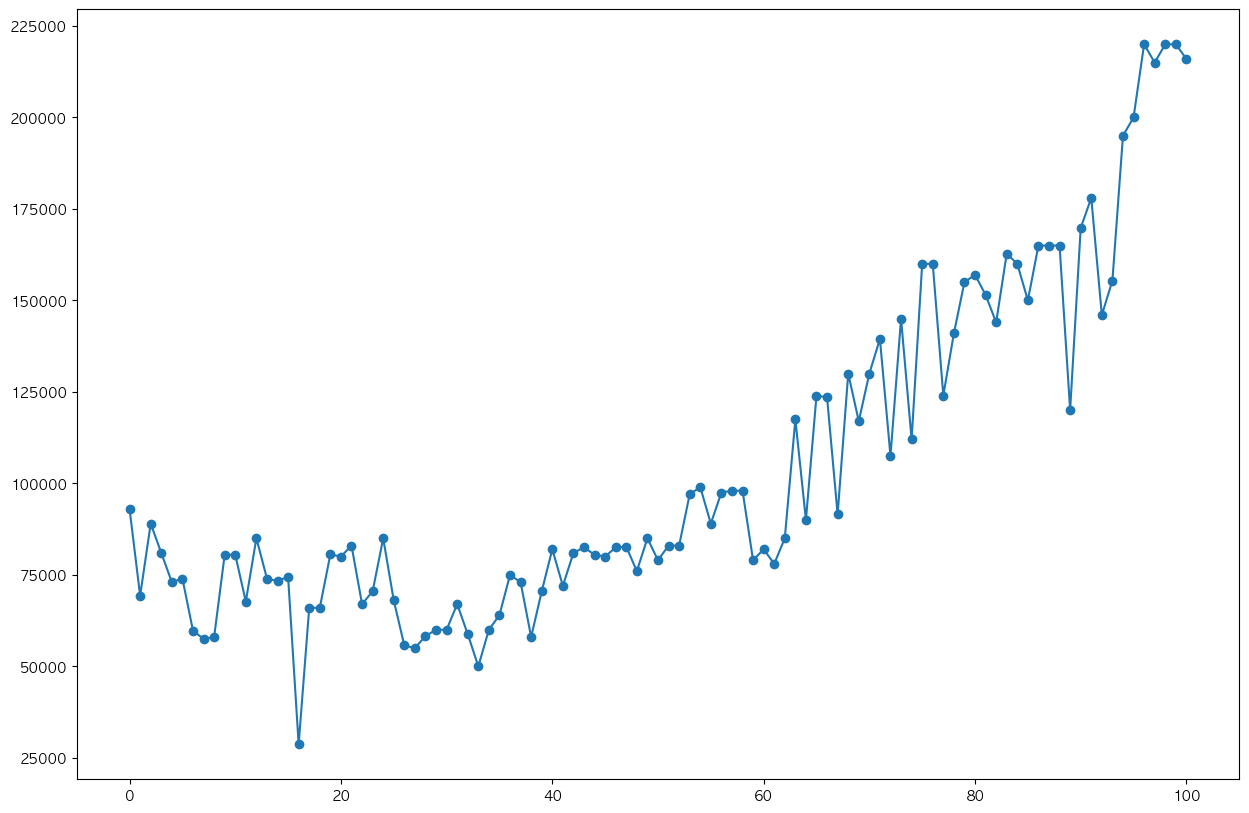

In [10]:
plt.figure(figsize=(15, 10))
test['target'].plot(marker='o')
plt.show()

In [11]:
test2 = find_outlier(apart_df_list[0])
test2

,level_0,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,...,아파트 카테고리,지하철 카테고리,구 카테고리,건설사 카테고리,가장 가까운 다리와의 거리,가장 가까운 다리 index,가장 가까운 다리,인근 한강다리 개수,인근 다리 개수 1개이상 3개 이하,학군
0,1075994,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,200703,9,2,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
1,1075995,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,200703,9,4,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
2,1004784,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,200804,17,4,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
3,1004785,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,200805,10,5,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
4,133981,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,200810,4,1,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,236526,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,202109,2,2,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
97,222654,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,202112,4,3,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
98,222655,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,202204,12,4,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
99,222656,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,202204,21,2,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0


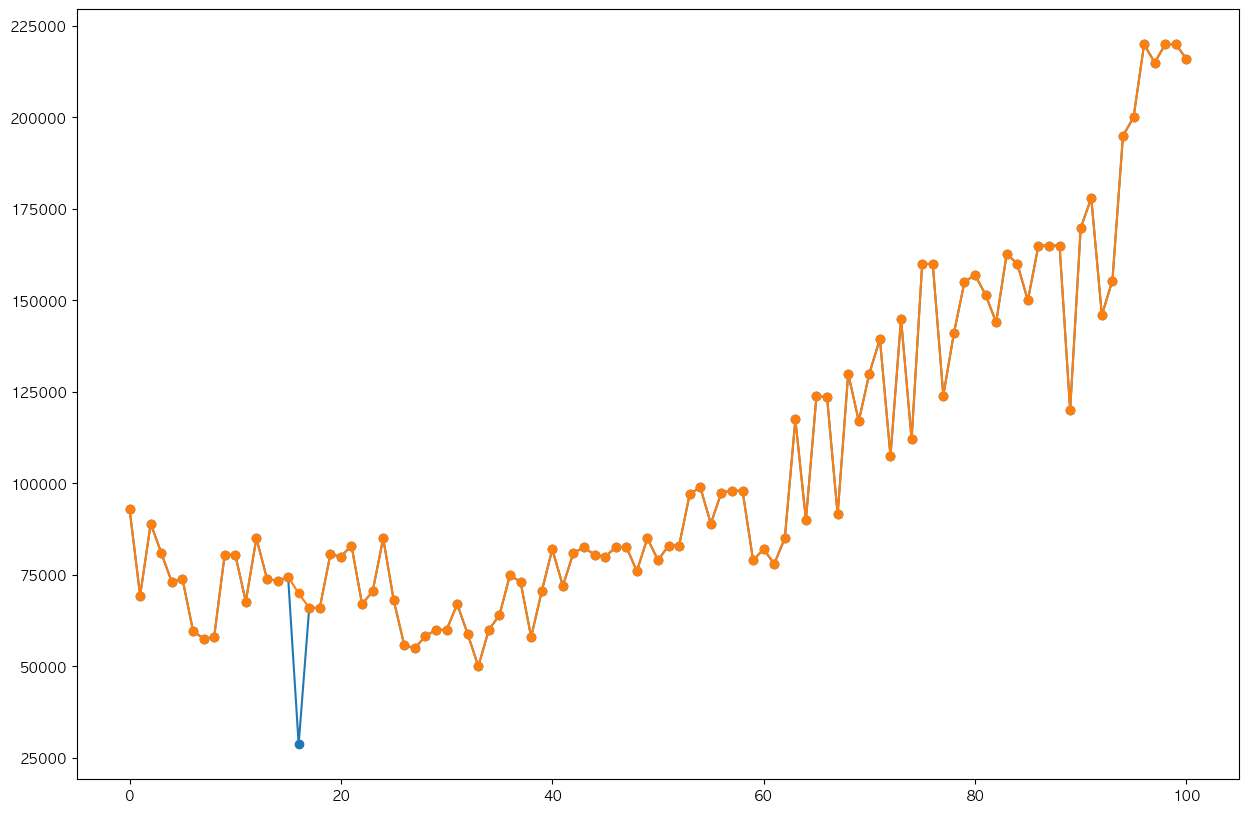

In [13]:
plt.figure(figsize=(15, 10))
test['target'].plot(marker='o')
test2['target'].plot(marker = 'o')
plt.show()

In [14]:
# 모든 데이터에 사용

result = []
l = len(apart_df_list)

for i in range(l):
    if i % 50 == 0:
        print(i)
    result.append(find_outlier(apart_df_list[i]))

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500


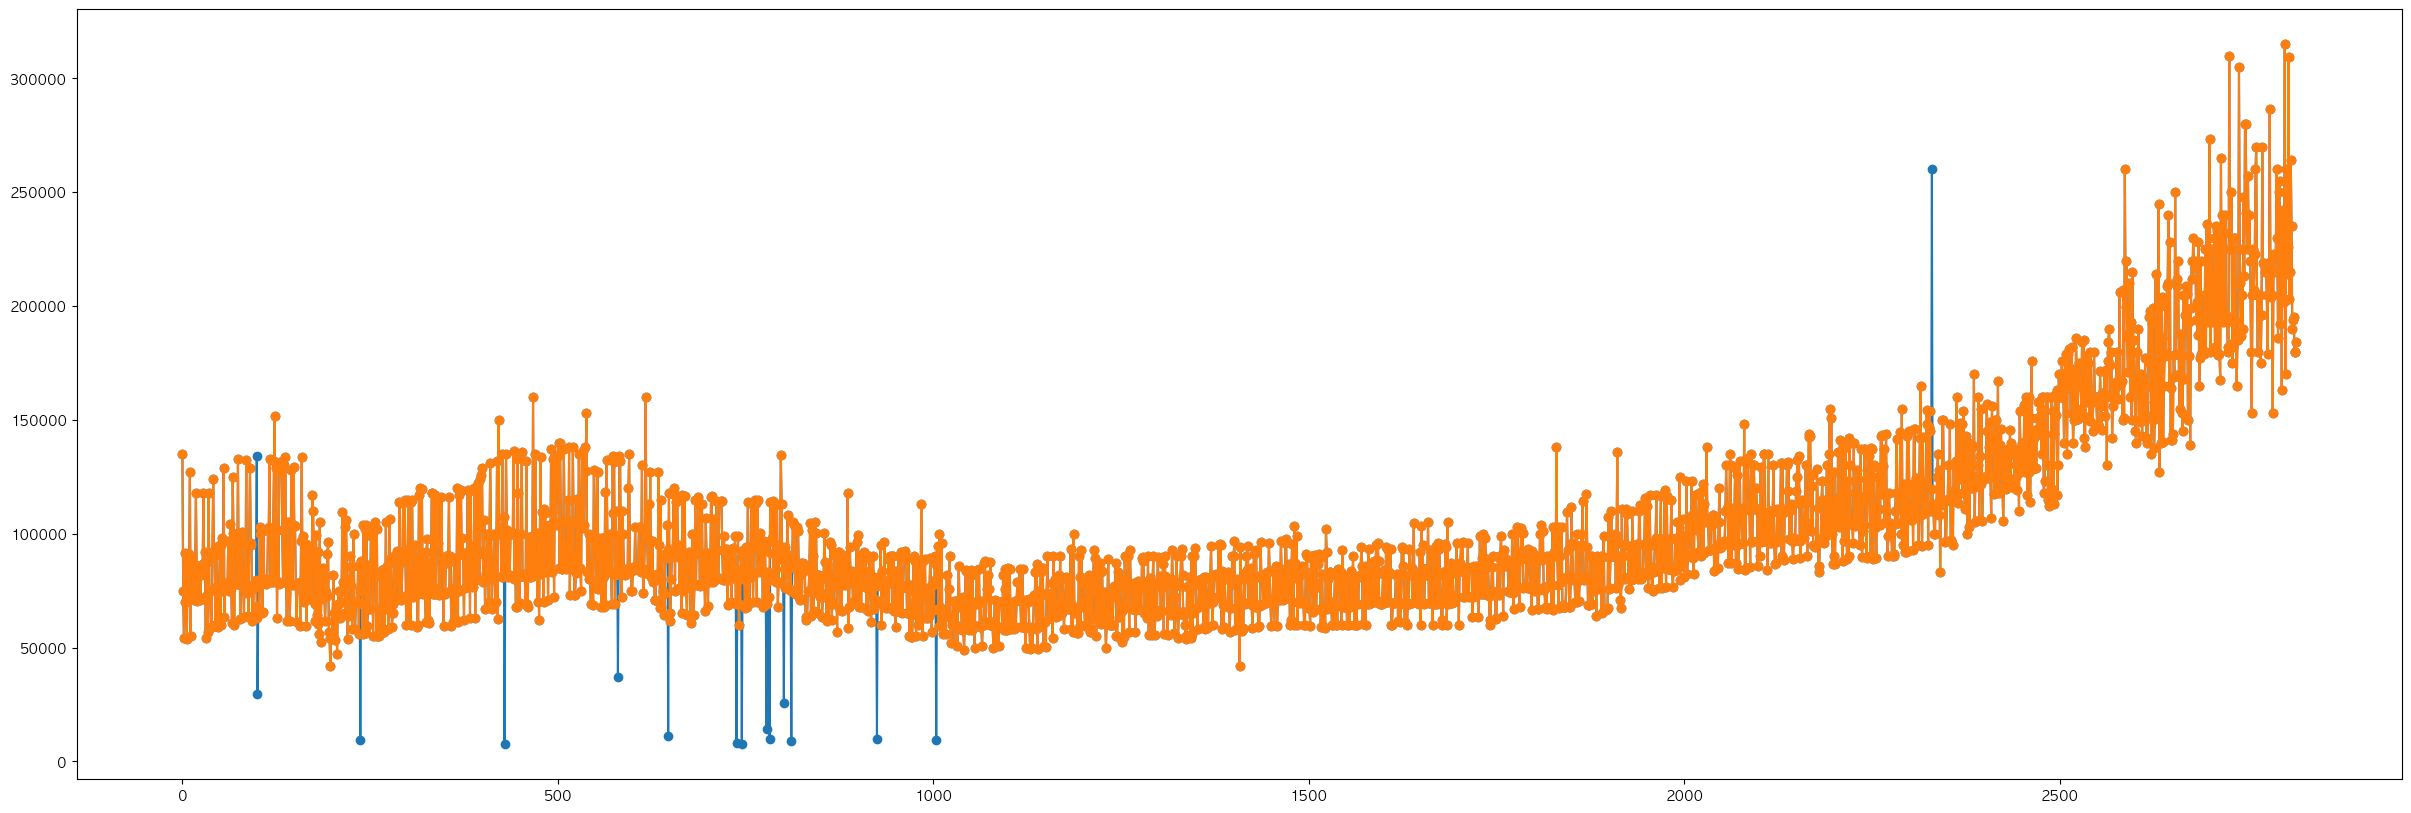

In [79]:
test = apart_df_list[3].sort_values(['계약년월', '계약일'])
test.reset_index(inplace=True)
test2 = result[3].sort_values(['계약년월', '계약일'])

plt.figure(figsize=(30, 10))
test['target'].plot(marker='o')
test2['target'].plot(marker='o')
plt.show()

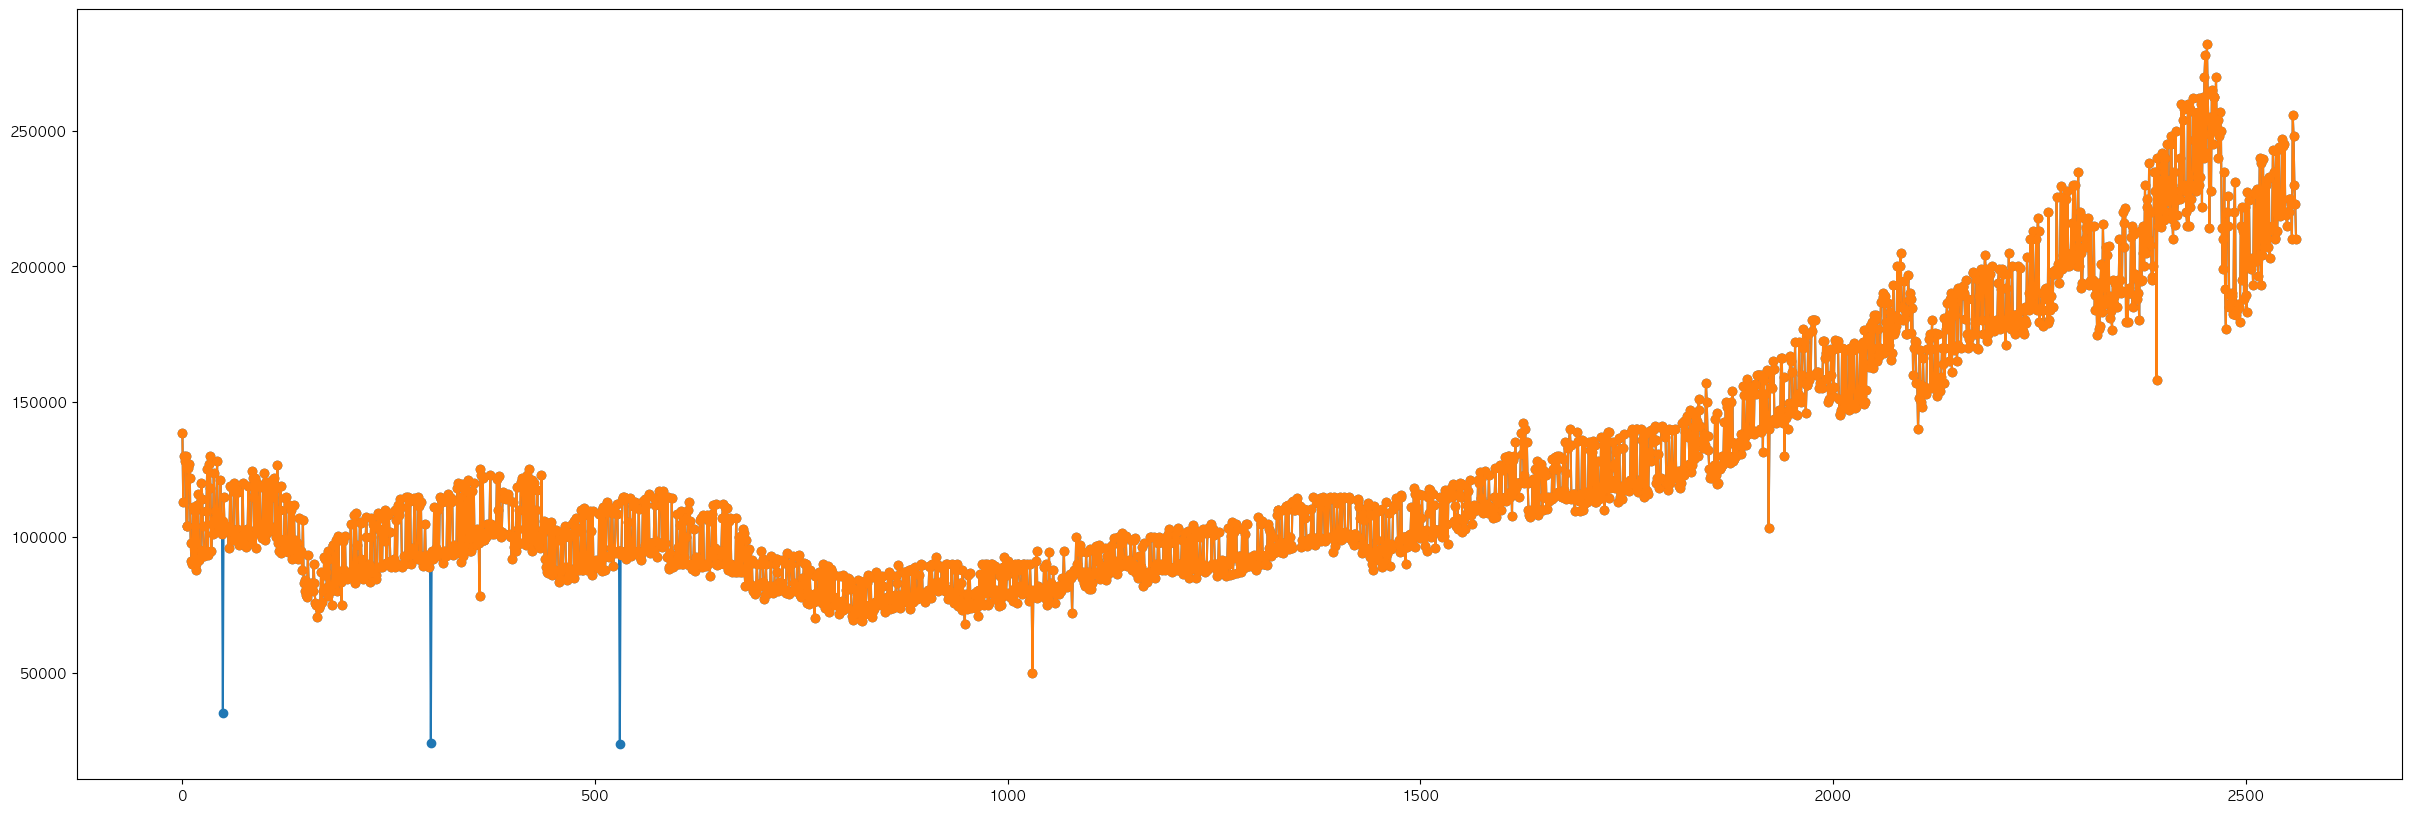

In [78]:
test = apart_df_list[20].sort_values(['계약년월', '계약일'])
test.reset_index(inplace=True)
test2 = result[20].sort_values(['계약년월', '계약일'])

plt.figure(figsize=(30, 10))
test['target'].plot(marker='o')
test2['target'].plot(marker='o')
plt.show()

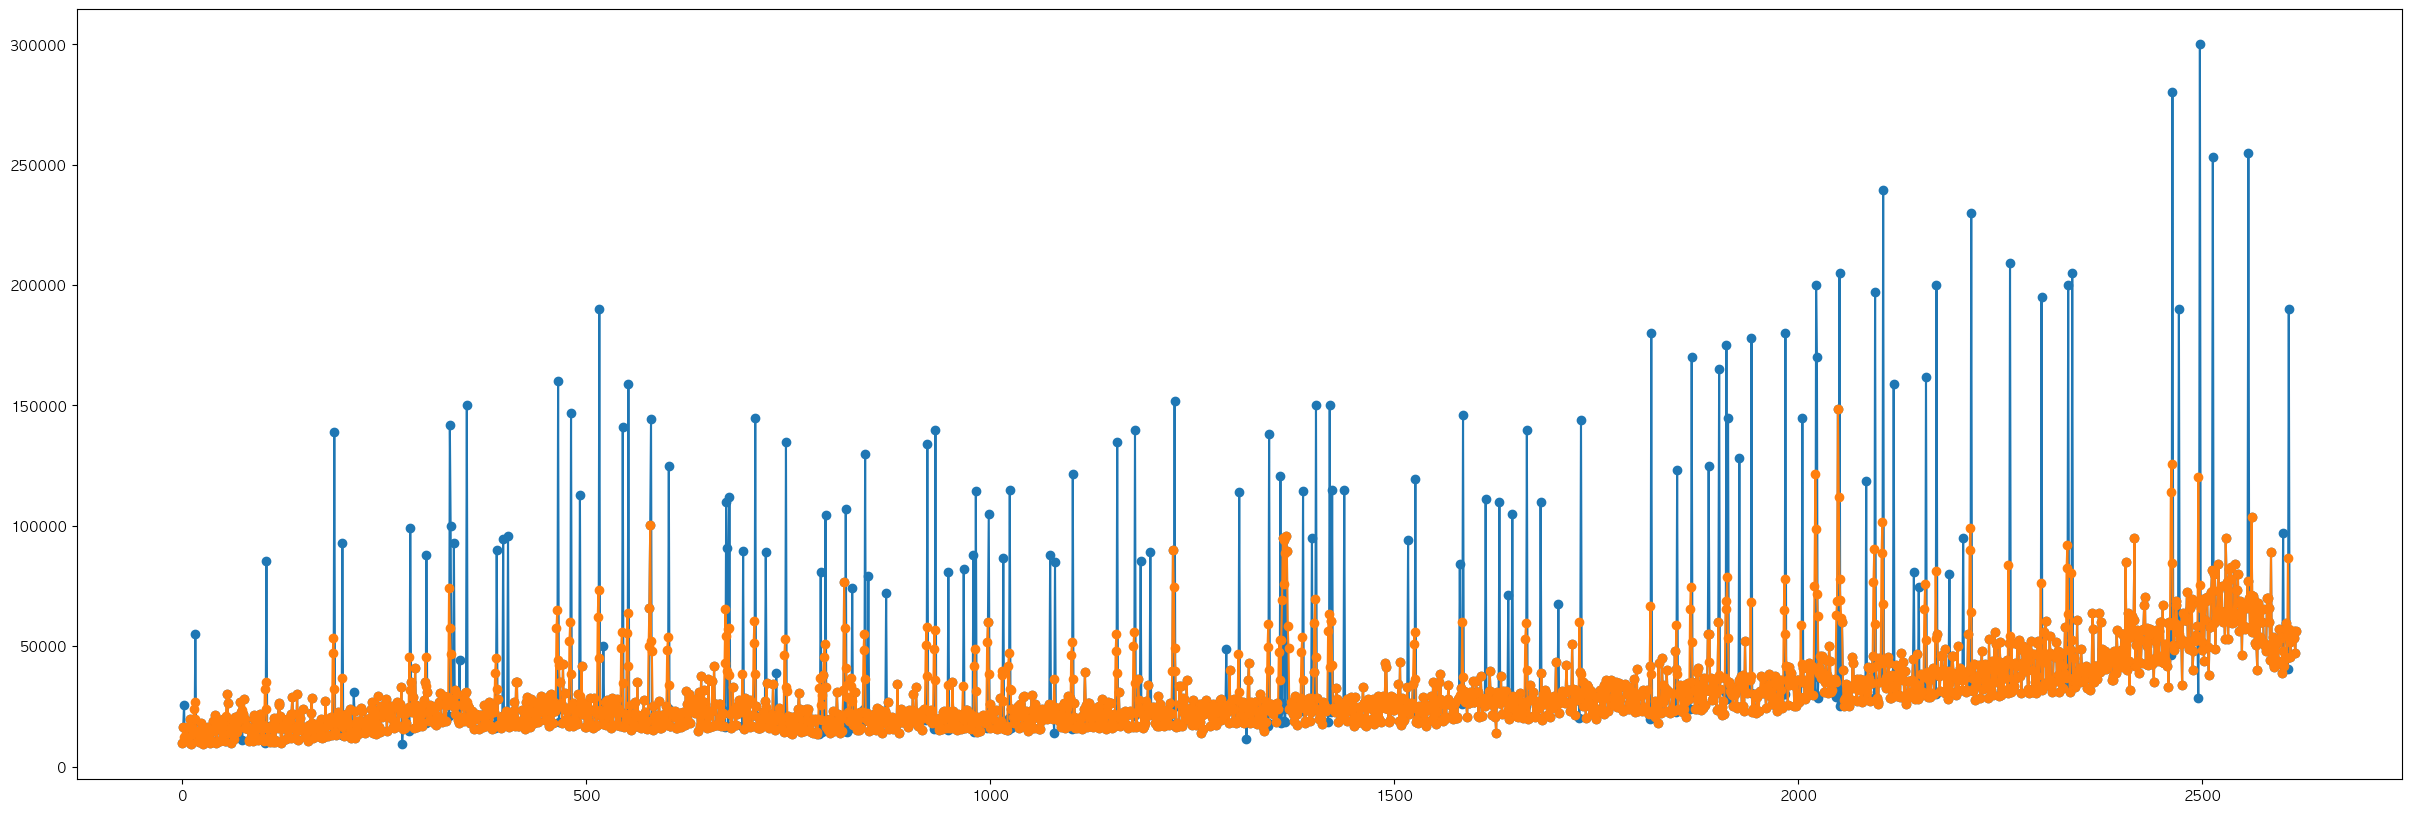

In [77]:
i = 1040
test = apart_df_list[i].sort_values(['계약년월', '계약일'])
test.reset_index(inplace=True)
test2 = result[i].sort_values(['계약년월', '계약일'])

plt.figure(figsize=(30, 10))
test['target'].plot(marker='o')
test2['target'].plot(marker='o')
plt.show()

In [53]:
result[1040][['아파트명', '좌표Y', '좌표X', '계약년월', 'target']].head(30)

,아파트명,좌표Y,좌표X,계약년월,target
0,장미,37.633702,127.067865,200701,9900.0000
1,장미,37.633702,127.067865,200701,16400.0000
2,장미,37.546199,126.918900,200701,12312.5000
3,장미,37.633702,127.067865,200701,12000.0000
4,장미,37.633702,127.067865,200701,10950.0000
5,장미,37.574300,126.817494,200701,12900.0000
6,장미,37.633702,127.067865,200701,16500.0000
7,장미,37.633702,127.067865,200701,10500.0000
8,장미,37.633702,127.067865,200701,10800.0000
9,장미,37.633702,127.067865,200701,9900.0000


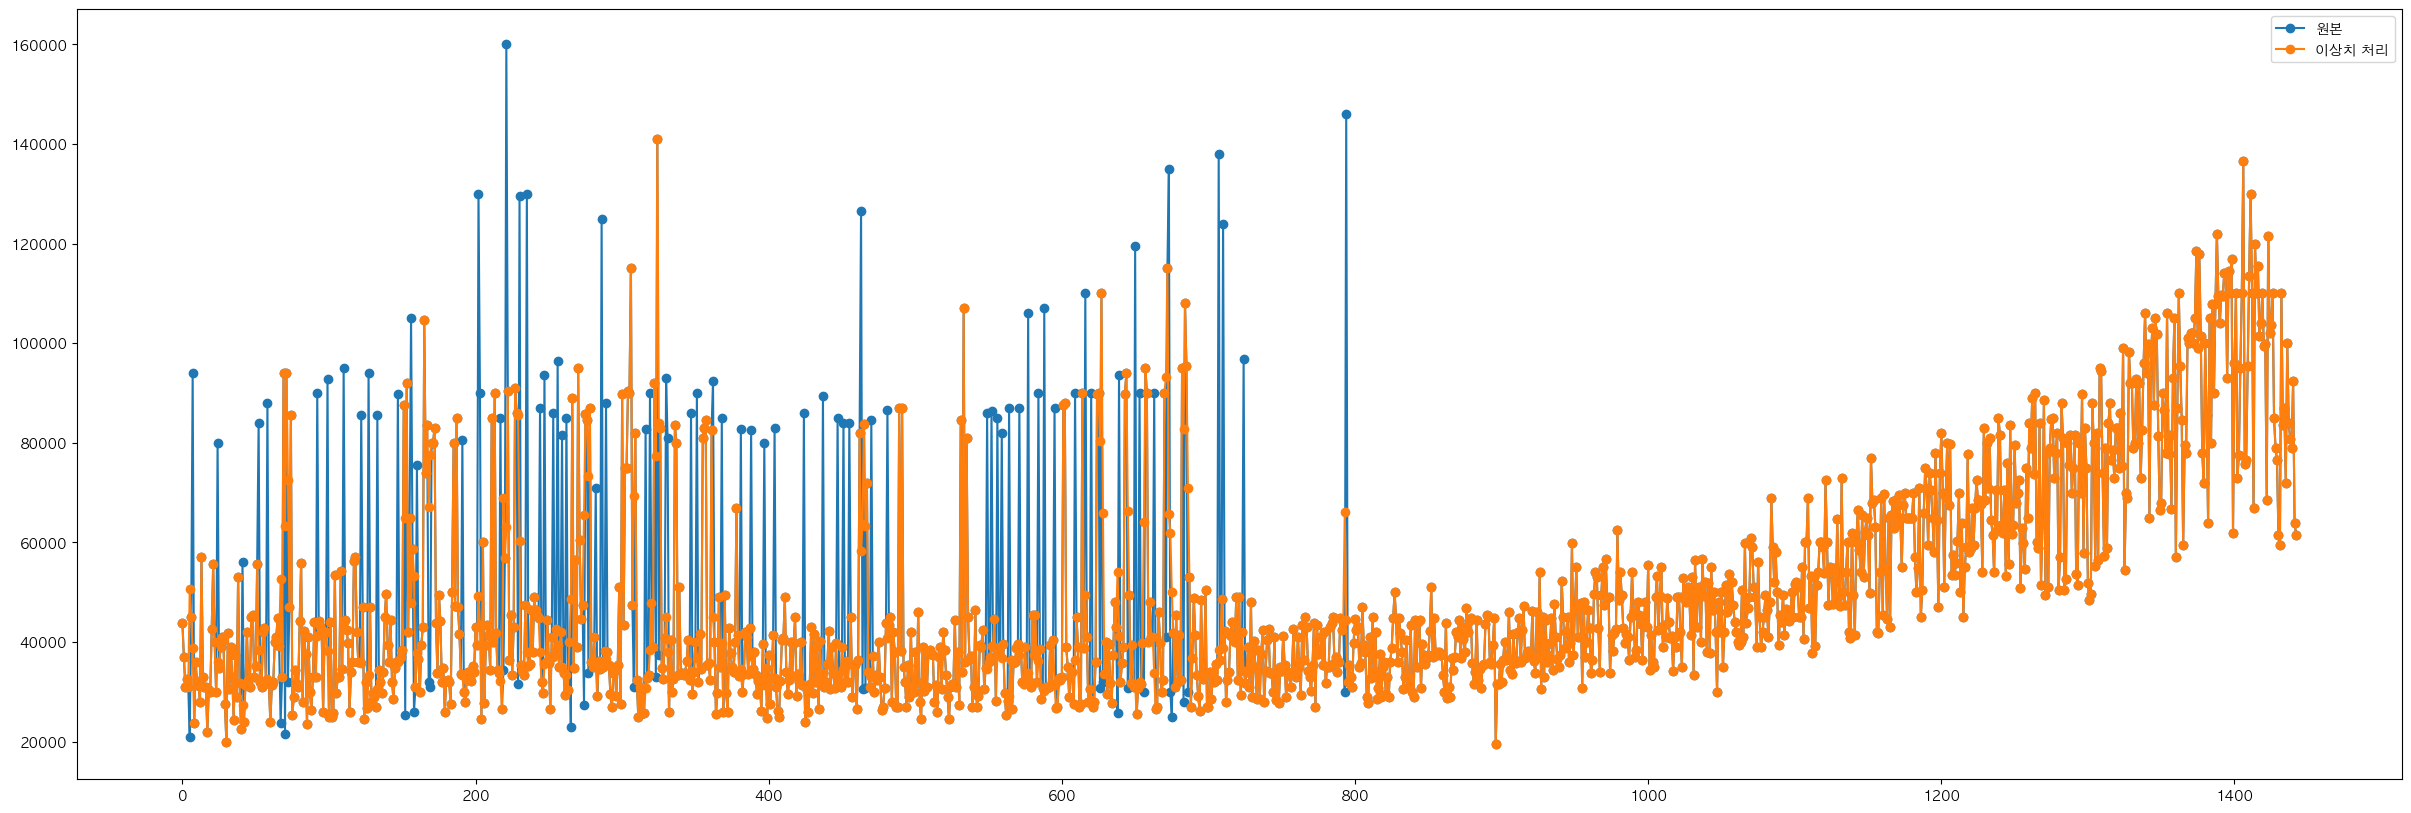

In [81]:
i = 1093
test = apart_df_list[i].sort_values(['계약년월', '계약일'])
test.reset_index(inplace=True)
test2 = result[i].sort_values(['계약년월', '계약일'])

plt.figure(figsize=(30, 10))
test['target'].plot(marker='o', label='원본')
test2['target'].plot(marker='o', label='이상치 처리')
plt.legend()
plt.show()

In [20]:
concat_df = pd.concat([apart_df for apart_df in result], axis=0)

In [21]:
concat_df

,level_0,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,...,아파트 카테고리,지하철 카테고리,구 카테고리,건설사 카테고리,가장 가까운 다리와의 거리,가장 가까운 다리 index,가장 가까운 다리,인근 한강다리 개수,인근 다리 개수 1개이상 3개 이하,학군
0,1075994,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,200703,9,2,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
1,1075995,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,200703,9,4,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
2,1004784,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,200804,17,4,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
3,1004785,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,200805,10,5,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
4,133981,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,200810,4,1,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1078700,서울특별시 강남구 역삼동,763,763.0,0.0,진달래3차,62.31,200703,8,7,...,기타,분당선,강남구,기타,3730.528347,17.0,청담대교,0.0,0,8.0
1,1078701,서울특별시 강남구 역삼동,763,763.0,0.0,진달래3차,62.31,200706,14,12,...,기타,분당선,강남구,기타,3730.528347,17.0,청담대교,0.0,0,8.0
0,1087036,서울특별시 구로구 구로동,807-39,807.0,39.0,807-39,59.84,200708,30,2,...,기타,7호선,기타,기타,6603.224673,6.0,서강대교,0.0,0,3.0
0,1109620,서울특별시 송파구 석촌동,227-12,227.0,12.0,밀란체,68.36,200705,25,6,...,기타,9호선,송파구,기타,2915.766140,18.0,잠실대교,0.0,0,6.0


In [23]:
concat_df.sort_values(['level_0'], inplace=True)
concat_df

,level_0,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,...,아파트 카테고리,지하철 카테고리,구 카테고리,건설사 카테고리,가장 가까운 다리와의 거리,가장 가까운 다리 index,가장 가까운 다리,인근 한강다리 개수,인근 다리 개수 1개이상 3개 이하,학군
65,0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
66,1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
67,2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
68,3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
69,4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,1118817,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200707,12,11,...,기타,6호선,기타,현대,6109.517072,2.0,가양대교,0.0,0,2.0
23,1118818,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200708,25,10,...,기타,6호선,기타,현대,6109.517072,2.0,가양대교,0.0,0,2.0
24,1118819,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200708,31,20,...,기타,6호선,기타,현대,6109.517072,2.0,가양대교,0.0,0,2.0
25,1118820,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200709,15,8,...,기타,6호선,기타,현대,6109.517072,2.0,가양대교,0.0,0,2.0


In [24]:
concat_df.drop(['level_0'], axis=1, inplace=True)
concat_df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,아파트 카테고리,지하철 카테고리,구 카테고리,건설사 카테고리,가장 가까운 다리와의 거리,가장 가까운 다리 index,가장 가까운 다리,인근 한강다리 개수,인근 다리 개수 1개이상 3개 이하,학군
65,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
66,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
67,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
68,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
69,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200707,12,11,1998,...,기타,6호선,기타,현대,6109.517072,2.0,가양대교,0.0,0,2.0
23,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200708,25,10,1998,...,기타,6호선,기타,현대,6109.517072,2.0,가양대교,0.0,0,2.0
24,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200708,31,20,1998,...,기타,6호선,기타,현대,6109.517072,2.0,가양대교,0.0,0,2.0
25,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200709,15,8,1998,...,기타,6호선,기타,현대,6109.517072,2.0,가양대교,0.0,0,2.0


In [25]:
test_df = df[df['is_test']==1]
test_df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,아파트 카테고리,지하철 카테고리,구 카테고리,건설사 카테고리,가장 가까운 다리와의 거리,가장 가까운 다리 index,가장 가까운 다리,인근 한강다리 개수,인근 다리 개수 1개이상 3개 이하,학군
1118822,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.9700,202307,26,5,1987,...,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0,8.0
1118823,서울특별시 강남구 개포동,651-1,651.0,1.0,개포더샵트리에,108.2017,202308,15,10,2021,...,기타,분당선,강남구,포스코,4696.525473,17.0,청담대교,0.0,0,8.0
1118824,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,161.0000,202307,28,15,1984,...,기타,분당선,강남구,기타,4811.419486,17.0,청담대교,0.0,0,8.0
1118825,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,133.4600,202308,10,14,1984,...,기타,분당선,강남구,기타,4811.419486,17.0,청담대교,0.0,0,8.0
1118826,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,104.4300,202308,18,6,1984,...,기타,분당선,강남구,기타,4811.419486,17.0,청담대교,0.0,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.6500,202307,19,13,2014,...,기타,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0,0,1.0
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.6200,202307,25,12,2014,...,기타,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0,0,1.0
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.6500,202308,27,12,2014,...,기타,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0,0,1.0
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.9400,202309,2,18,2014,...,기타,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0,0,1.0


In [26]:
re_df = pd.concat([concat_df, test_df], axis=0)

In [29]:
re_df[['is_test']]

,is_test
65,0
66,0
67,0
68,0
69,0
...,...
1128089,1
1128090,1
1128091,1
1128092,1


In [31]:
re_df.to_csv('../data/preprocessed/28_target_outlier.csv', index=False)